# Student name:  Feiyang Li

# Student ID:  23202564

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose:
To check your understanding of key terms used throughout this module.

## Answer

First represent each data point in the dataset as a point in the input space that has two coordinates (features), one of which is the perimeter and the other is the weight.
        
Next, we set an unknown objective function, which is a function that ideally would perfectly distinguish between two classes of objects, but in reality we do not know its exact form. The goal of perceptron classification is to find a function that is as close to it as possible through learning.

The dataset contains multiple samples for the purpose of training the perceptron model. Each sample consists of its features.

To find a good classification function, we define a hypothesis set, which is the set of all possible classification functions. In perceptron models, these functions are usually linear and are used to partition the input space into two parts, each corresponding to a classification (1 or -1).

We select a best hypothesis from the set of hypotheses, called the final hypothesis, through a training process. This process involves comparing the performance of each hypothesis, using an error metric to evaluate their accuracy in classification. Specifically, we compute the classification error of each hypothesis on the dataset, which is called the in-sample error.

We are also concerned with the performance of this hypothesis on new, unseen data, i.e., the out-of-sample error. A good classification model not only performs well on the training set, but also generalises well to new data.

# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

In [3]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [4]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

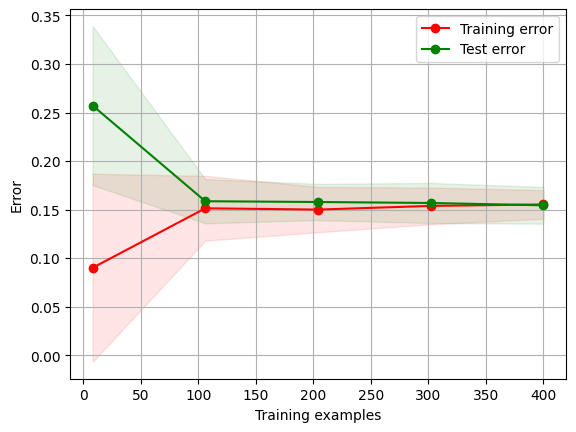

In [5]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

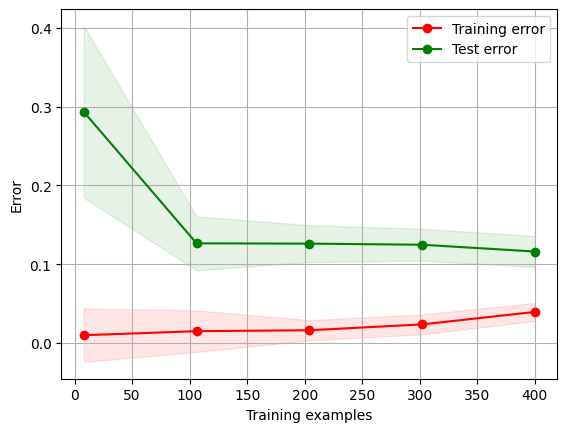

In [6]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why it is possible for the training error to be higher than the test error.
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


1. The model learns directly on the training data, so it tends to perform better on the training data.


2. although uncommon, the training error may be higher than the testing error in some cases, especially when there is less training data. This may be because the test set happens to be more easily learned by the model than the training set, or because the training set contains more noise and outliers.

3. when the number of training samples is small, the model may fit well to these small number of data points, resulting in a low training error. However, as the number of samples increases, the model needs to generalise to more data points, which may increase the model's error on the training set, especially if the model is not complex enough to capture the complexity of all the data points.


4. the test error of the second model decreases as the number of training samples increases, indicating that it is better able to learn from more data. At the same time, the gap between the training error and the testing error is relatively small, which usually indicates that the model has better generalisation ability. Therefore, we can infer that the second model may be more sophisticated because it is better able to generalise to new data without a significant increase in training error due to an increase in the number of training samples.

# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [7]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [8]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

In [9]:
data = pd.read_csv('/content/Et1_Task3a.csv', names=['X', 'y'], header=None)

In [10]:
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]
    w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w_best

In [11]:
def calc_error(w, X, y):
    y_pred = X.dot(w[1:]) + w[0]
    mse = np.mean((y - y_pred) ** 2)
    return mse

In [12]:
X = data['X'].values.reshape(-1, 1)
y = data['y'].values

w_best = linear_regression(X, y)

mse = calc_error(w_best, X, y)

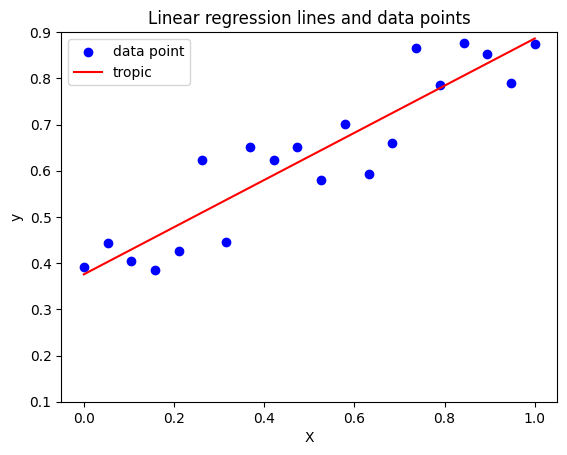

MSE: 0.004281801813255595


In [13]:
plt.scatter(X, y, color='blue', label='data point')

X_new = np.array([[X.min()], [X.max()]])
y_predict = X_new.dot(w_best[1]) + w_best[0]
plt.plot(X_new, y_predict, color='red', label='tropic')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression lines and data points')
plt.legend()
plt.ylim(0.1, 0.9)
plt.show()

print('MSE:', mse)

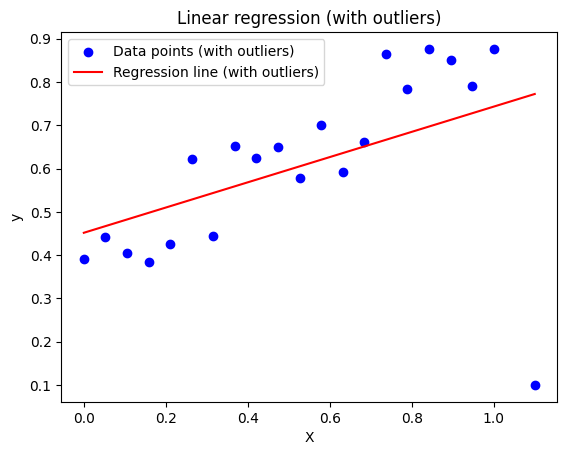

MSE with outliers: 0.03088034030898259


In [14]:
X_outlier = np.append(X, 1.1)
y_outlier = np.append(y, 0.1)

w_best_outlier = linear_regression(X_outlier.reshape(-1, 1), y_outlier)

mse_outlier = calc_error(w_best_outlier, X_outlier.reshape(-1, 1), y_outlier)

plt.scatter(X_outlier, y_outlier, color='blue', label='Data points (with outliers)')

X_new_outlier = np.array([[X_outlier.min()], [X_outlier.max()]])
y_predict_outlier = X_new_outlier.dot(w_best_outlier[1]) + w_best_outlier[0]
plt.plot(X_new_outlier, y_predict_outlier, color='red', label='Regression line (with outliers)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression (with outliers)')
plt.legend()
plt.show()

print('MSE with outliers:', mse_outlier)

##  Describe and Explain
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function?
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

1. The data point furthest away from the regression line (the point in the lower right corner) will add the largest error term to the optimised error function in a graph containing outliers.
2. Proportional. In an optimisation error function such as the mean square error (MSE), the error of an individual data point is the square of the difference between its actual y-value and the y-value predicted by the regression line. Thus, the further a data point is from the regression line, the more error it contributes.
3. Outliers can affect linear regression by overly influencing the slope and intercept of the regression line through their contribution to the error function. If outliers are included in the data set, they will have a disproportionate effect on the position of the regression line due to their large error squared terms, shifting the regression line towards these points, and as a result, may result in a poorer fit to the rest of the data.
4. Under what circumstances is a linear regression with a squared error measure a good model?  
Linear regression with a squared error metric is a good model when there is a linear relationship between the data points and the error (or noise) is relatively small and follows a Gaussian distribution. The least squares method is effective in estimating the parameters of the fitted model for prediction purposes.

 # Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## 1
Hoffding bounds tell us how close a classifier's performance on unknown data may be to its performance on training data. The concept of smashing relates to how complex a data situation the classifier can handle. If a model can perfectly distinguish all possible combinations of points in a dataset, then we say that the dataset is smashed by the model. A breakpoint is the smallest dataset size that the model cannot distinguish perfectly. The growth function is the rate at which the number of situations a model can handle grows as the amount of data we have increases.VC bounds are a measure of classifier complexity based on these concepts. When applying machine learning in practice, you need to have at least 10 times the amount of data than the VC bounds so that your model can learn more consistently and not have too little data to capture the true patterns in the data.

## 2
The trade-off between approximation and generalisation means that we need to find a balance between the complexity of the model and its ability to generalise when designing a machine learning model. If the model is too complex, it may learn some random noise in the data so that it doesn't necessarily perform well on new data, which is overfitting. If the model is too simple, it may not learn the patterns in the data well, which is underfitting. What we're looking for is a model that is not too complex and not too simple, that learns the patterns in the data but also applies well to new data.